1. Початковi 2D-данi представити графiчно.
2. Розбити данi на навчальний, перевiрочний та тестовий набори. Перевiрочний набiр використати для налаштування гiперпараметрiв. Тестовий набiр використати для остаточної оцiнки якостi моделей.
3. Побудувати ансамблi моделей, використовуючи наступнi методи AdaBoostClassifier. Розглянути рiзнi значення learning_rate та algorithm.
4. В задачах класифiкацiї навести приклад границi рiшень decision boundaries на основi окремої моделi та ансамблю.
Побудувати графiки на однiй координатнiй площинi (для регресiї):
- прогнозiв на основi ансамблю,
- прогнозiв на основi окремої моделi base_estimator / estimators,
- точок даних з перевiрочної / тестової множин.

5. Розрахувати значення змiщення та дисперсiї для окремої моделi та ансамблю.




In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns
import pandas as pd
import numpy as np
from random import sample

np.random.default_rng(111)

Generator(PCG64) at 0x240C0CAE900

In [2]:
X, y = fetch_covtype(return_X_y=True, as_frame=True)
data = pd.concat([X, y], axis=1)

Оскільки це надвеликий набір, то я залишила від нього лише 25 рандомних рядків

In [3]:
dataset = data.sample(n=100)

In [4]:
dataset

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
568038,2718.0,105.0,17.0,255.0,65.0,1908.0,246.0,218.0,95.0,1065.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
357338,2563.0,137.0,22.0,108.0,25.0,1250.0,247.0,226.0,96.0,1237.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
94699,2682.0,122.0,11.0,60.0,2.0,1041.0,238.0,232.0,123.0,2021.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
417639,3104.0,118.0,18.0,240.0,81.0,2806.0,248.0,221.0,95.0,1209.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
215011,3062.0,87.0,13.0,153.0,22.0,1259.0,239.0,217.0,106.0,2177.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426081,3189.0,83.0,25.0,268.0,85.0,2808.0,245.0,189.0,59.0,1548.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
533561,3233.0,279.0,11.0,787.0,15.0,3407.0,188.0,241.0,193.0,1082.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
166619,3230.0,0.0,11.0,700.0,69.0,4158.0,204.0,220.0,153.0,3469.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
319657,3042.0,99.0,9.0,390.0,70.0,2415.0,235.0,228.0,123.0,2311.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
y = dataset['Cover_Type']
X = dataset.drop('Cover_Type', axis=1)

In [6]:
#Розбити данi на навчальний, перевiрочний та тестовий набори.
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, y,
                     test_size=0.20,
                     random_state=111)


In [7]:
def scoring_and_matrix(y_true, y_predicted):
    confussion = metrics.confusion_matrix(y_true, y_predicted)
    sns.heatmap(confussion, annot=True, fmt='g', cmap='Blues')
    print(f'accuracy: {metrics.accuracy_score(y_true, y_predicted)} \n \
    precision: {metrics.precision_score(y_true, y_predicted, average="micro")} \n \
    recall: {metrics.recall_score(y_true, y_predicted, average="micro")} \n \
    f1_score: {metrics.f1_score(y_true, y_predicted, average="micro")}' )

In [8]:
def gridsearchscore(classifier):
    print(f'Best score: {classifier.best_score_}, Best params: {classifier.best_params_}')

Розглянемо кореляцію ознак, бвчимо що мультиколлінеарності немає

<AxesSubplot:>

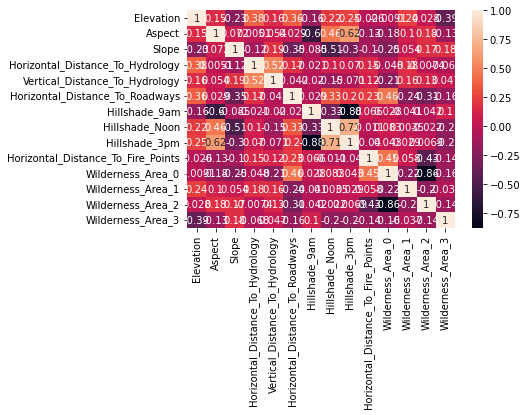

In [9]:
sns.heatmap(X_train.iloc[:, :14].corr(), annot=True)

Розглянемо різні значення n_estimators, learning_rate та algorithm в ансамблях моделей AdaBoostClassifier

Спершу для перевірки використаємо алгоритм з SVC

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics

svc=SVC(probability=True, kernel='linear')

classifier = AdaBoostClassifier(base_estimator=svc, n_estimators=50, learning_rate=1, algorithm='SAMME.R')

model = classifier.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.55


In [11]:
classifier = AdaBoostClassifier(base_estimator=svc, n_estimators=50, learning_rate=1, algorithm='SAMME')

model = classifier.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.35


In [12]:
classifier = AdaBoostClassifier(base_estimator=svc, n_estimators=25, learning_rate=1, algorithm='SAMME.R')

model = classifier.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.55


In [14]:
classifier = AdaBoostClassifier(base_estimator=svc, n_estimators=50, learning_rate=0.2, algorithm='SAMME.R')

model = classifier.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.6


accuracy: 0.6 
     precision: 0.6 
     recall: 0.6 
     f1_score: 0.6


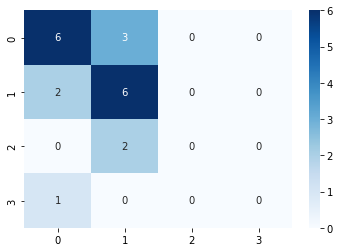

In [15]:
y_predict = classifier.predict(X_test)
scoring_and_matrix(Y_test, y_predict)

accuracy: 0.7125 
     precision: 0.7125 
     recall: 0.7125 
     f1_score: 0.7125


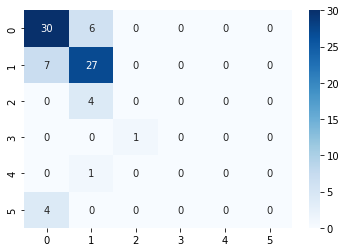

In [16]:
y_predict = classifier.predict(X_train)
scoring_and_matrix(Y_train, y_predict)

In [28]:
classifier = AdaBoostClassifier(base_estimator=svc)

model = classifier.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.55


accuracy: 0.6 
     precision: 0.6 
     recall: 0.6 
     f1_score: 0.6


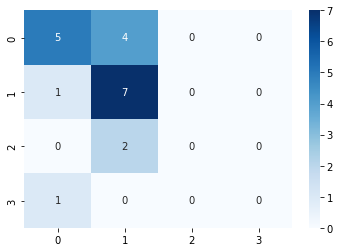

In [30]:
y_predict = classifier.predict(X_test)
scoring_and_matrix(Y_test, y_predict)

accuracy: 0.7 
     precision: 0.7 
     recall: 0.7 
     f1_score: 0.7


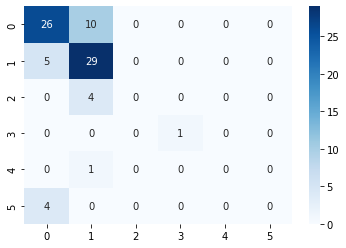

In [31]:
y_predict = classifier.predict(X_train)
scoring_and_matrix(Y_train, y_predict)

Тепер для перевірки візьмемо DecisionTreeClassifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1, algorithm='SAMME.R')
model = classifier.fit(X_train, Y_train) 
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.6


In [34]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),  n_estimators=100, learning_rate=1, algorithm='SAMME')
model = classifier.fit(X_train, Y_train) 
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.6


In [35]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),  n_estimators=100, learning_rate=1, algorithm='SAMME.R')
model = classifier.fit(X_train, Y_train) 
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.6


In [37]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),  n_estimators=100, learning_rate=0.2, algorithm='SAMME.R')
model = classifier.fit(X_train, Y_train) 
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.5


accuracy: 0.6 
     precision: 0.6 
     recall: 0.6 
     f1_score: 0.6


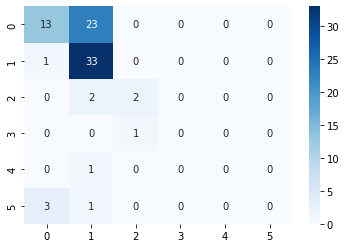

In [21]:
y_predict = classifier.predict(X_train)
scoring_and_matrix(Y_train, y_predict)

accuracy: 0.45 
     precision: 0.45 
     recall: 0.45 
     f1_score: 0.45


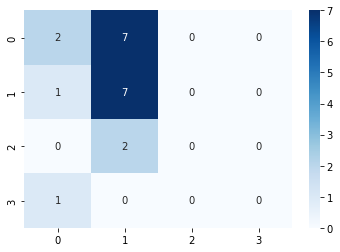

In [22]:
y_predict = classifier.predict(X_test)
scoring_and_matrix(Y_test, y_predict)

In [29]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1))
model = classifier.fit(X_train, Y_train) 
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.6


accuracy: 0.7 
     precision: 0.7 
     recall: 0.7 
     f1_score: 0.7


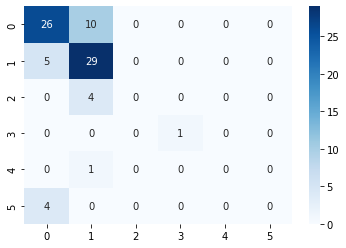

In [32]:
y_predict = classifier.predict(X_train)
scoring_and_matrix(Y_train, y_predict)

accuracy: 0.6 
     precision: 0.6 
     recall: 0.6 
     f1_score: 0.6


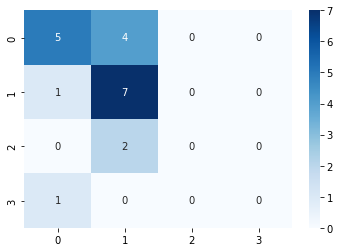

In [33]:
y_predict = classifier.predict(X_test)
scoring_and_matrix(Y_test, y_predict)

In [23]:
from sklearn.model_selection import GridSearchCV

classifier = AdaBoostClassifier()

parameters = {
    'learning_rate': np.arange(0.1, 5.1, 0.1),
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(classifier, parameters, scoring='accuracy', n_jobs=-1, cv=5)

In [24]:
grid_search.fit(X_train, Y_train)

d:\anaconda_\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])},
             scoring='accuracy')

In [39]:
gridsearchscore(grid_search)

Best score: 0.625, Best params: {'algorithm': 'SAMME', 'learning_rate': 0.7000000000000001}


accuracy: 0.5 
     precision: 0.5 
     recall: 0.5 
     f1_score: 0.5


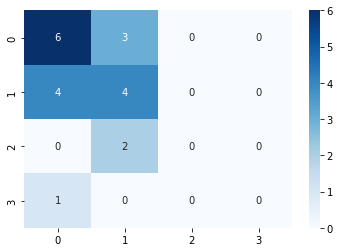

In [25]:
scoring_and_matrix(Y_test, grid_search.predict(X_test))

accuracy: 0.7125 
     precision: 0.7125 
     recall: 0.7125 
     f1_score: 0.7125


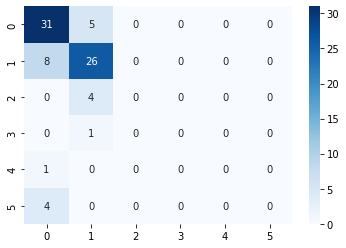

In [26]:
scoring_and_matrix(Y_train, grid_search.predict(X_train))

### графік

In [70]:
classifier = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.7000000000000001, n_estimators=10).fit(X_train, Y_train)

In [71]:
arr = np.array([[classifier.n_estimators, metrics.accuracy_score(Y_test, classifier.predict(X_test))]])

In [72]:
classifier = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.7000000000000001, n_estimators=20).fit(X_train, Y_train)

In [73]:
arr = np.append(arr, values=[[classifier.n_estimators, metrics.accuracy_score(Y_test, classifier.predict(X_test))]], axis=0)

In [74]:
classifier = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.7000000000000001, n_estimators=30).fit(X_train, Y_train)

In [75]:
arr = np.append(arr, values=[[classifier.n_estimators, metrics.accuracy_score(Y_test, classifier.predict(X_test))]], axis=0)

In [76]:
classifier = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.7000000000000001, n_estimators=40).fit(X_train, Y_train)

In [77]:
arr = np.append(arr, values=[[classifier.n_estimators, metrics.accuracy_score(Y_test, classifier.predict(X_test))]], axis=0)

In [78]:
classifier = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.7000000000000001, n_estimators=50).fit(X_train, Y_train)

In [79]:
arr = np.append(arr, values=[[classifier.n_estimators, metrics.accuracy_score(Y_test, classifier.predict(X_test))]], axis=0)

In [80]:
classifier = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.7000000000000001, n_estimators=60).fit(X_train, Y_train)

In [81]:
arr = np.append(arr, values=[[classifier.n_estimators, metrics.accuracy_score(Y_test, classifier.predict(X_test))]], axis=0)

In [82]:
classifier = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.7000000000000001, n_estimators=70).fit(X_train, Y_train)

In [83]:
arr = np.append(arr, values=[[classifier.n_estimators, metrics.accuracy_score(Y_test, classifier.predict(X_test))]], axis=0)

<AxesSubplot:>

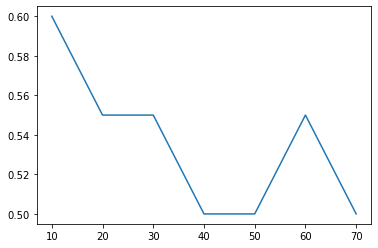

In [84]:
sns.lineplot(x=arr[:, 0], y=arr[:, 1])

In [85]:
from mlxtend.evaluate import bias_variance_decomp
mse, bias, var = bias_variance_decomp(classifier, X_train.values, Y_train.values, X_test.values, Y_test.values, loss='mse', num_rounds=200, random_seed=123)

print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)

MSE from bias_variance lib [avg expected loss]: 3.057
Avg Bias: 2.530
Avg Variance: 0.528


Висновки

6. Час навчання ансамблю завжди трохи більший за час моделей, які утворюють ці ансамблі. 

7. Зробити висновки. Чи краще на заданих даних виконується ансамбль порiвняно з iндивiдуальними моделями?
Ні, ансамбль краще виконується на індивідуальних моделях, лише з base_estimator. Адже ансамблеві методи працюють краще, коли індивідуальні прогнозатори є якомога більш незалежними один від одного.

Рiзнi значення learning_rate та algorithm було розглянуто вручну та підібрано кращі значення за допомогою grid_reasch.
Можна зробити висновок (для алгоритму SVC), що для algorithm метод 'SAMME.R' є кращим, адже показує кращі результати та потребує меньше часу для роботи. Також кращі значення видаються при меньшому learning_rate.
Для алгоритму DecisionTreeClassifier має значення зміна learning_rate, при меньших значеннях результати гірші.
Два методи, SVC та DecisionTreeClassifier, при однаоих метриках, дають майже однакові результати, DecisionTreeClassifier показав себе трохи краще.
